In [14]:
from pyspark.sql import SparkSession
import json
from routers import riotAPI

In [15]:
spark = SparkSession.builder \
    .appName("Fetch API Data") \
    .getOrCreate()

In [ ]:
response = await riotAPI.detailedMatch('EUW1_6373165991')
with open('data/match_data.json', 'w', encoding='utf-8') as f:
                json.dump(response['info']['participants'], f, ensure_ascii=False, indent=4) 

In [17]:
df = spark.read.json("data/match_data.json", multiLine=True)
df.show()

df = df.select("championName", "totalDamageDealtToChampions", "summonerName")
df = df.orderBy("totalDamageDealtToChampions", ascending=False)
df.show()

+----------+-------------+-------+---------+----------+----------+-----------+--------------------+---------------+----------+----------+------------+-----------------+------------+--------------------+----------------------+-----------------------+--------------------+-------------------+-----------+------+-------------------+-----------+-----------+----------------------+-----------------+----------------+----------------+--------------+----------------+--------------+-------------------------+--------------------+------------+----------+---------+---------+------------------+--------------+------------------+--------------+-----+-----+-----+-----+-----+-----+-----+--------------+-------------+-----+------+---------------------+-------------------+----------------+----------------------+----------------+---------------------------+----------------+---------------+--------------------+----------+---------+--------------+----------------+-----------------------+------------+-----------

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

df_pandas = df.toPandas()
df_pandas = df_pandas.sort_values(by='totalDamageDealtToChampions', ascending=True)

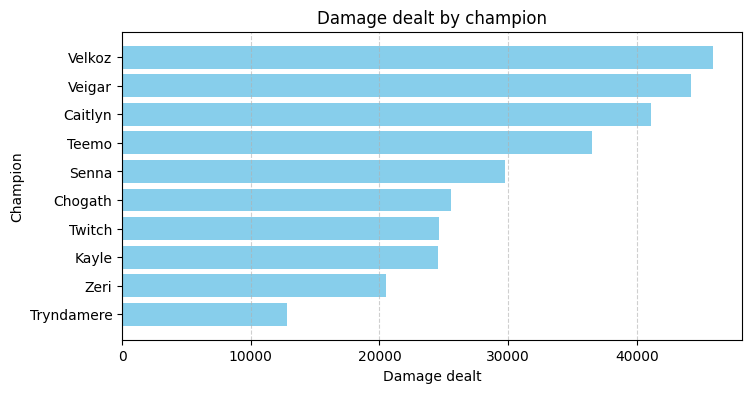

In [19]:
plt.figure(figsize=(8, 4)) 
plt.barh(df_pandas['championName'], df_pandas['totalDamageDealtToChampions'], color='skyblue')
plt.xlabel('Damage dealt')
plt.ylabel('Champion')
plt.title('Damage dealt by champion')
plt.grid(axis='x', linestyle='--', alpha=0.6)  

plt.show()